# Part 4: NN on Reduced Car Dataset

In [1]:
# Basic Setup

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


from sklearn.decomposition import PCA, FastICA, TruncatedSVD
from sklearn.random_projection import GaussianRandomProjection
from scipy.stats import kurtosis

## Dimensionality Reduction on Car Dataset

In [2]:
# Car Dataset Setup

cars_df = pd.read_csv("data/car_evaluation.csv", names = ["buying","maint", "doors", "persons", "lug_boot","safety","class"])
cars_df.head()
cleanup_nums = {"class":     {"unacc": 4, "acc": 3,'good': 2,'vgood':1}
                }
cars_df.replace(cleanup_nums,inplace = True)
target = cars_df['class']
print(target.value_counts())

cars_df.drop( ['class'],axis = 1,inplace = True)
cars_df_categorical = pd.get_dummies(cars_df)
cars_df_categorical.head()

X_train,X_test,Y_train,Y_test = train_test_split(cars_df_categorical, target, random_state=42)

print(len(X_train))
print(len(Y_train))
print(len(X_test))
print(len(Y_test))

target.value_counts()

sc=StandardScaler()
sc.fit(X_train)
X_train_std=sc.transform(X_train)
X_test_std=sc.transform(X_test)

storage = {
    'ica_kurt': [],
    'rp_kurt': [],
}


whole_dataset = np.concatenate((X_train_std,X_test_std),axis=0)
print(whole_dataset.shape)

4    1210
3     384
2      69
1      65
Name: class, dtype: int64
1296
1296
432
432
(1728, 21)


/Users/harshsikka/opt/anaconda3/envs/CS-7641-A3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype uint8 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/harshsikka/opt/anaconda3/envs/CS-7641-A3/lib/python3.7/site-packages/ipykernel_launcher.py:26: DataConversionWarning: Data with input dtype uint8 were all converted to float64 by StandardScaler.
/Users/harshsikka/opt/anaconda3/envs/CS-7641-A3/lib/python3.7/site-packages/ipykernel_launcher.py:27: DataConversionWarning: Data with input dtype uint8 were all converted to float64 by StandardScaler.


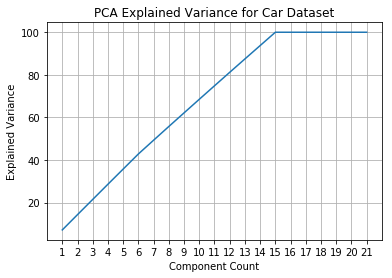

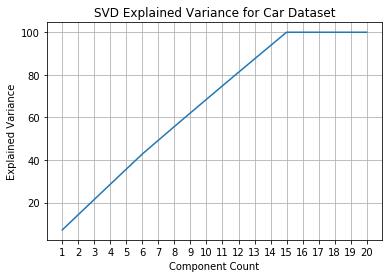

(1728, 14)


In [3]:
# PCA

car_pca = PCA()
car_reduced_X_train = car_pca.fit_transform(whole_dataset)

plt.figure()
plt.plot(np.arange(1,22), 100*np.cumsum(car_pca.explained_variance_ratio_))
plt.title('PCA Explained Variance for Car Dataset')
plt.ylabel('Explained Variance')
plt.xlabel('Component Count')
plt.grid()
plt.xticks(np.arange(1,22))
plt.show()



# SVD

car_svd = TruncatedSVD(n_components=20)
car_reduced_X_train = car_svd.fit_transform(whole_dataset)

plt.figure()
plt.plot(np.arange(1,21), 100*np.cumsum(car_svd.explained_variance_ratio_))
plt.title('SVD Explained Variance for Car Dataset')
plt.ylabel('Explained Variance')
plt.xlabel('Component Count')
plt.grid()
plt.xticks(np.arange(1,21))
plt.show()


#final datasets for nn 
pca_dataset = PCA(n_components=14).fit_transform(whole_dataset)
print(pca_dataset.shape)
svd_dataset = TruncatedSVD(n_components=15).fit_transform(whole_dataset)


/Users/harshsikka/opt/anaconda3/envs/CS-7641-A3/lib/python3.7/site-packages/sklearn/decomposition/fastica_.py:121: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning)
/Users/harshsikka/opt/anaconda3/envs/CS-7641-A3/lib/python3.7/site-packages/sklearn/decomposition/fastica_.py:305: UserWarning: n_components is too large: it will be set to 21
  warnings.warn('n_components is too large: it will be set to %s' % n_components)
/Users/harshsikka/opt/anaconda3/envs/CS-7641-A3/lib/python3.7/site-packages/sklearn/decomposition/fastica_.py:121: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning)
/Users/harshsikka/opt/anaconda3/envs/CS-7641-A3/lib/python3.7/site-packages/sklearn/decomposition/fastica_.py:305: UserWarning: n_components is too large: it will be set to 21
  warnings.warn('n_components is too large: it will be set to %s' 

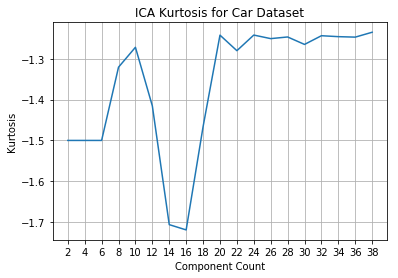

In [4]:
# ICA

component_range = np.arange(2, 40, 2)

for i in component_range:
    car_ica = FastICA(n_components=i)
    car_reduced_X_train  = car_ica.fit_transform(whole_dataset)
    storage['ica_kurt'].append(np.mean(kurtosis(car_reduced_X_train)))

plt.figure()
plt.plot(component_range, storage['ica_kurt'])
plt.title('ICA Kurtosis for Car Dataset')
plt.ylabel('Kurtosis')
plt.xlabel('Component Count')
plt.grid()
plt.xticks(component_range)
plt.show()

/Users/harshsikka/opt/anaconda3/envs/CS-7641-A3/lib/python3.7/site-packages/sklearn/random_projection.py:379: DataDimensionalityWarning: The number of components is higher than the number of features: n_features < n_components (21 < 22).The dimensionality of the problem will not be reduced.
  DataDimensionalityWarning)
/Users/harshsikka/opt/anaconda3/envs/CS-7641-A3/lib/python3.7/site-packages/sklearn/random_projection.py:379: DataDimensionalityWarning: The number of components is higher than the number of features: n_features < n_components (21 < 24).The dimensionality of the problem will not be reduced.
  DataDimensionalityWarning)
/Users/harshsikka/opt/anaconda3/envs/CS-7641-A3/lib/python3.7/site-packages/sklearn/random_projection.py:379: DataDimensionalityWarning: The number of components is higher than the number of features: n_features < n_components (21 < 26).The dimensionality of the problem will not be reduced.
  DataDimensionalityWarning)
/Users/harshsikka/opt/anaconda3/envs/

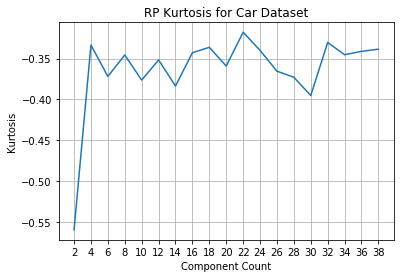

/Users/harshsikka/opt/anaconda3/envs/CS-7641-A3/lib/python3.7/site-packages/sklearn/random_projection.py:379: DataDimensionalityWarning: The number of components is higher than the number of features: n_features < n_components (21 < 32).The dimensionality of the problem will not be reduced.
  DataDimensionalityWarning)


In [5]:
# RP

component_range = np.arange(2, 40, 2)

for i in component_range:
    car_rp = GaussianRandomProjection(n_components=i)
    car_reduced_X_train  = car_rp.fit_transform(whole_dataset)
    storage['rp_kurt'].append(np.mean(kurtosis(car_reduced_X_train)))

plt.figure()
plt.plot(component_range, storage['rp_kurt'])
plt.title('RP Kurtosis for Car Dataset')
plt.ylabel('Kurtosis')
plt.xlabel('Component Count')
plt.grid()
plt.xticks(component_range)
plt.show()

#final datasets for nn 
rp_dataset = GaussianRandomProjection(n_components=32).fit_transform(whole_dataset)
ica_dataset = FastICA(n_components=16).fit_transform(whole_dataset)

### Neural Network Tuning and Results

In [6]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.model_selection import validation_curve
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix
import time

In [7]:
# PCA
print(pca_dataset.shape)
nn = MLPClassifier(max_iter=2000,early_stopping=True,random_state=55)

best_nn = GridSearchCV(nn, param_grid={'alpha' : np.logspace(-1, 2, 5), 'learning_rate_init' : np.logspace(-5, 0, 6)}, cv=5, n_jobs=4)
train_t0 = time.time()
best_nn.fit(pca_dataset[0:1296], Y_train)
train_t1 = time.time()
t0 = time.time()
prediction = best_nn.predict(pca_dataset[1296:])
t1 = time.time()

print('Train Time: ', train_t1 - train_t0)
print('Test Time: ', t1 - t0)
print('Top Accuracy:', (accuracy_score(Y_test, prediction) * 100))
print('Top params: ', best_nn.best_params_)

from sklearn.metrics import confusion_matrix
print(confusion_matrix(Y_test, prediction))

(1728, 14)
Train Time:  6.260149002075195
Test Time:  0.0007369518280029297
Top Accuracy: 96.99074074074075
Top params:  {'alpha': 0.1, 'learning_rate_init': 0.01}
[[ 18   0   2   0]
 [  0  14   1   0]
 [  1   8  93   1]
 [  0   0   0 294]]


/Users/harshsikka/opt/anaconda3/envs/CS-7641-A3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [8]:
# SVD
print(svd_dataset.shape)
nn = MLPClassifier(max_iter=2000,early_stopping=True,random_state=55)

best_nn = GridSearchCV(nn, param_grid={'alpha' : np.logspace(-1, 2, 5), 'learning_rate_init' : np.logspace(-5, 0, 6)}, cv=5, n_jobs=4)
train_t0 = time.time()
best_nn.fit(svd_dataset[0:1296], Y_train)
train_t1 = time.time()
t0 = time.time()
prediction = best_nn.predict(svd_dataset[1296:])
t1 = time.time()

print('Train Time: ', train_t1 - train_t0)
print('Test Time: ', t1 - t0)
print('Top Accuracy:', (accuracy_score(Y_test, prediction) * 100))
print('Top params: ', best_nn.best_params_)

from sklearn.metrics import confusion_matrix
print(confusion_matrix(Y_test, prediction))

(1728, 15)
Train Time:  4.495251893997192
Test Time:  0.0006139278411865234
Top Accuracy: 96.29629629629629
Top params:  {'alpha': 0.1, 'learning_rate_init': 0.1}
[[ 17   2   1   0]
 [  0  14   1   0]
 [  2   6  93   2]
 [  0   0   2 292]]


In [9]:
# ICA
nn = MLPClassifier(max_iter=2000,early_stopping=True,random_state=55)

best_nn = GridSearchCV(nn, param_grid={'alpha' : np.logspace(-1, 2, 5), 'learning_rate_init' : np.logspace(-5, 0, 6)}, cv=5, n_jobs=4)
train_t0 = time.time()
best_nn.fit(ica_dataset[0:1296], Y_train)
train_t1 = time.time()
t0 = time.time()
prediction = best_nn.predict(ica_dataset[1296:])
t1 = time.time()

print('Train Time: ', train_t1 - train_t0)
print('Test Time: ', t1 - t0)
print('Top Accuracy:', (accuracy_score(Y_test, prediction) * 100))
print('Top params: ', best_nn.best_params_)

from sklearn.metrics import confusion_matrix
print(confusion_matrix(Y_test, prediction))

Train Time:  1.9625842571258545
Test Time:  0.0003981590270996094
Top Accuracy: 87.26851851851852
Top params:  {'alpha': 0.1, 'learning_rate_init': 1.0}
[[  4   0  16   0]
 [  0   0  15   0]
 [  0   0  92  11]
 [  0   0  13 281]]


In [10]:
# RP
nn = MLPClassifier(max_iter=2000,early_stopping=True,random_state=55)

best_nn = GridSearchCV(nn, param_grid={'alpha' : np.logspace(-1, 2, 5), 'learning_rate_init' : np.logspace(-5, 0, 6)}, cv=5, n_jobs=4)
train_t0 = time.time()
best_nn.fit(rp_dataset[0:1296], Y_train)
train_t1 = time.time()
t0 = time.time()
prediction = best_nn.predict(rp_dataset[1296:])
t1 = time.time()

print('Train Time: ', train_t1 - train_t0)
print('Test Time: ', t1 - t0)
print('Top Accuracy:', (accuracy_score(Y_test, prediction) * 100))
print('Top params: ', best_nn.best_params_)

from sklearn.metrics import confusion_matrix
print(confusion_matrix(Y_test, prediction))

Train Time:  4.23742413520813
Test Time:  0.0005388259887695312
Top Accuracy: 97.22222222222221
Top params:  {'alpha': 0.5623413251903491, 'learning_rate_init': 0.01}
[[ 20   0   0   0]
 [  1  14   0   0]
 [  1   7  92   3]
 [  0   0   0 294]]
